In [60]:
import numpy as np
import emcee
import matplotlib.pyplot as plt

In [73]:
#np.random.seed(1)
np.random.seed(0)
num=20
length=6
X=np.random.rand(num)*length
A=1.5
w=3
phi=np.pi/3
const=3
ex=np.random.rand(num)*0.1
ey=np.random.rand(num)*0.2
Y=A*np.sin(w*X+phi)+const+ey
theta0=np.array([ A,  w,  phi,  const])

In [62]:
X.size

30

In [63]:
Y.size

30

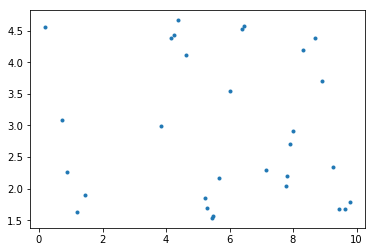

In [64]:
plt.plot(X,Y,'.')
plt.show()

In [65]:
def log_prior(theta):
    return 0
    
def log_likelihood(X,Y,theta,ex,ey):
    #Y=A*np.sin(w*X+phi)+const+ey
    A=theta[0]
    w=theta[1]
    phi=theta[2]
    const=theta[3]
    dY=Y-A*np.sin(w*X+phi)-const
    return -np.sum((dY/ey)**2)-np.sum(ex**2)
    
def log_posterior(theta, X, Y, ex,ey):
    return log_prior(theta) + log_likelihood(X,Y,theta,ex,ey)   



In [66]:
x = np.array([ 0,  3,  9, 14, 15, 19, 20, 21, 30, 35,
              40, 41, 42, 43, 54, 56, 67, 69, 72, 88])
y = np.array([33, 68, 34, 34, 37, 71, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71])

In [67]:
Y.shape,x.shape

((30,), (20,))

In [74]:
# Note that this step will take a few minutes to run!

ndim = 4  # number of parameters in the model
nwalkers = 100  # number of MCMC walkers
nburn = 10000  # "burn-in" period to let chains stabilize
nsteps = 15000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(1)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:,:] = np.random.normal(theta0, 0.5, (nwalkers,4))


import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[X,Y,ex,ey])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)



In [75]:
sample.shape

(500000, 4)

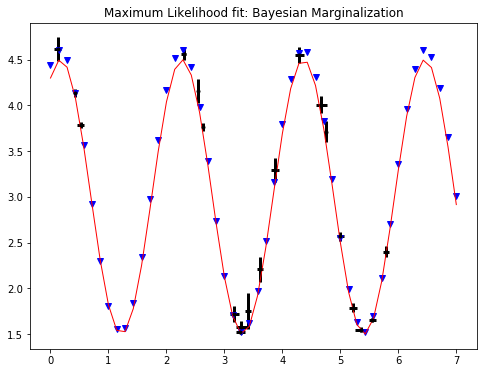

[ 1.54445625  2.98978747  1.09900656  3.06603454] 
 [ 1.5         3.          1.04719755  3.        ]


In [88]:
from IPython.core.pylabtools import figsize
plt.figure(figsize=(8,6))
plt.errorbar(X, Y, xerr=ex,yerr=ey, fmt='.k', ecolor='black',lw=3)
cutoff=490000#chain to stabilize
xfit = np.linspace(0, length+1)
thetaw = np.mean(sample[cutoff:,:], 0)
plt.plot(xfit, thetaw[0]*np.sin(thetaw[1]*xfit+thetaw[2])+thetaw[3], 'bv',lw=2)
plt.plot(xfit, theta0[0]*np.sin(theta0[1]*xfit+theta0[2])+theta0[3], 'r-',lw=1)
plt.title('Maximum Likelihood fit: Bayesian Marginalization')
plt.show()
print(thetaw,'\n',theta0)

/Users/brettlv/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


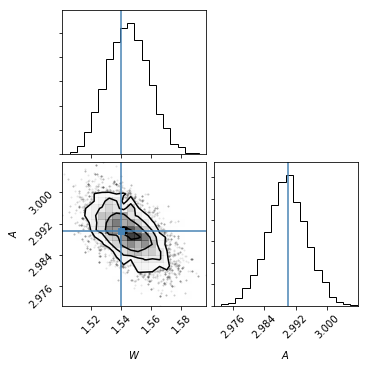

In [87]:
import corner
%matplotlib inline
fig = corner.corner(sample[cutoff:,:2], labels=["$W$", "$A$",],
                      truths=[1.54,2.99])
fig.show()

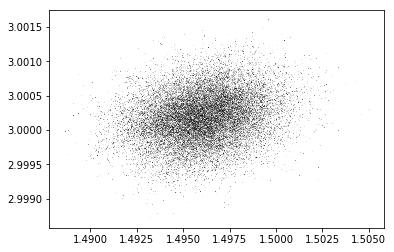

In [34]:
#plt.plot(sample[cutoff:, :2], ',k', alpha=0.1)
plt.plot(sample[cutoff:,0], sample[cutoff:,1],',k', alpha=0.1)


In [ ]:
?np.random.seed()

In [ ]:
np.random.seed(1)
X=np.random.rand(30)*10
A=1.5
w=3
phi=np.pi/3
Y=A*np.sin(w*X+phi)+np.random.rand(30)*0.01
plt.plot(X,Y,'.')
plt.show()

In [89]:
10*365*86400

315360000

In [ ]:
import pymc